<b> 소융대 소프트웨어학부 데이터 불러오기 </b>

In [14]:
import pandas as pd

file_path = "C:/ie/2022_2학기_중앙감사_소프트웨어학부.xlsx - 결산안.csv"
sw = pd.read_csv(file_path, skiprows=2)

sw = sw.iloc[2:, 1:]
sw = sw.drop([2, 3], axis=0)

sw.columns = ['날짜', '내용', '수입', '지출', '잔액', '사업', '세부항목', '', '']
sw = sw.drop(['', ''], axis=1)

# Remove the '₩' symbol and convert the columns to integers
sw['수입'] = pd.to_numeric(sw['수입'].str.replace('₩', '').str.replace(',', ''), errors='coerce').astype('Int64')
sw['지출'] = pd.to_numeric(sw['지출'].str.replace('₩', '').str.replace(',', ''), errors='coerce').astype('Int64')
sw['잔액'] = pd.to_numeric(sw['잔액'].str.replace('₩', '').str.replace(',', ''), errors='coerce').astype('Int64')

sw.reset_index(drop=True, inplace=True)
sw


,날짜,내용,수입,지출,잔액,사업,세부항목
0,2022-06-25,입출금통장 이자,712,0,10546417,이자,입출금통장 이자
1,2022-06-28,조현서,0,14110,10532307,입금 실수 환불,입금 실수 환불[조*서]
2,2022-06-30,(주)윈큐브마케팅,0,44700,10487607,수습부원 프로젝트,이디야 커피 카페 아메리카노(ice) 15개
3,2022-06-30,새콤유자,1,0,10487608,기타,계좌 확인용 자동이체
4,2022-06-30,카카오페이,0,80000,10407608,수습부원 프로젝트,카카오페이 BHC 뿌링클+콜라 1.25L 4개
...,...,...,...,...,...,...,...
87,2022-12-10,우아한 형제들,0,100000,5322725,기말고사 야식사업,배민상품권 1만원권 * 10개
88,2022-12-10,주식회사 우아한형제,0,100000,5222725,기말고사 야식사업,배민상품권 1만원권 * 10개
89,2022-12-12,카카오뱅크 캐시백지급,2586,0,5225311,기타,카카오뱅크 캐시백지급
90,2022-12-24,입출금통장 이자,372,0,5225683,기타,입출금통장 이자


<b> 소융대 소프트웨어학부 학생회비

In [15]:
first_balance = sw.loc[0, '잔액']
print(first_balance,'원')

10546417 원


<b> 소융대 소프트웨어학부 월별총지출

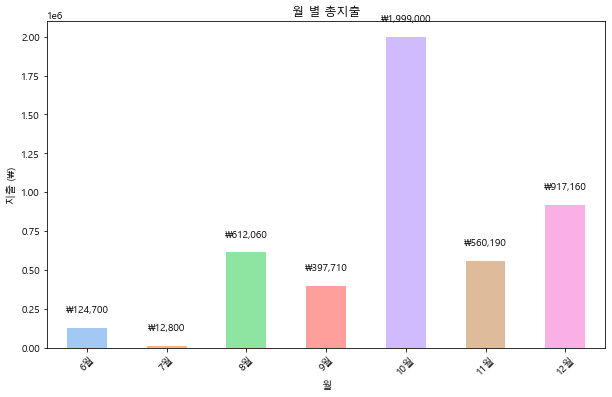

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert the '날짜' column to datetime format
sw['날짜'] = pd.to_datetime(sw['날짜'])

# Group the data by month and calculate the total spending per month
monthly_spending = sw.groupby(sw['날짜'].dt.month)['지출'].sum()

# Set the color palette
colors = sns.color_palette("pastel")

# Plot the bar graph
ax = monthly_spending.plot(kind='bar', figsize=(10, 6), color=colors)

# Add labels and title
ax.set_xlabel('월')
ax.set_ylabel('지출 (₩)')
ax.set_title('월 별 총지출')

# Add spending values above the bars
for i, value in enumerate(monthly_spending):
    ax.text(i, value + 100000, f'₩{value:,}', ha='center')

# Set the x-axis tick labels
ax.set_xticklabels(['6월', '7월', '8월', '9월', '10월', '11월', '12월'], rotation=45)

plt.show()


c:\Users\dbeed\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8 ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


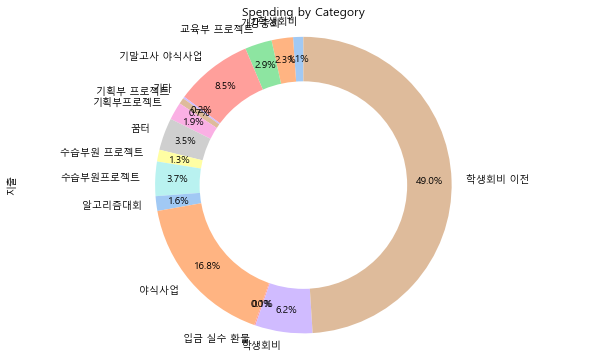

In [17]:
# Calculate the total spending for each category
category_spending = sw.groupby('사업')['지출'].sum()

# Plot a pie chart
fig, ax = plt.subplots(figsize=(10, 6))
category_spending.plot(kind='pie', ax=ax, colors=colors, autopct='%.1f%%', startangle=90, pctdistance=0.85)

# Add title
ax.set_title('Spending by Category')

# Add a white circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie chart is circular
ax.axis('equal')

plt.show()


<b> 소프트웨어학부에서 가장 많았던 사업 TOP 10

In [37]:
# Sort the DataFrame by the '지출' column in descending order
sorted_sw = sw[sw['사업'] != '학생회비 이전'].sort_values('지출', ascending=False)

# Display the top 10 items with the highest spending excluding '학생회비 이전' and any rows with '환불' in the '세부항목' column
top_spending_items = sorted_sw[~sorted_sw['세부항목'].str.contains('환불') & (sorted_sw['사업'] != '학생회비 이전')].head(10)
top_spending_items


,날짜,내용,수입,지출,잔액,사업,세부항목
52,2022-10-15,(주)푸드트래블,0,896500,7517289,야식사업,"(주) 푸드트래블에서 스테이크 덮밥 12000원 100개 , 1200000원, 부가..."
55,2022-10-25,(주)푸드트래블,0,896500,6667789,야식사업,"스테이크 덮밥 12000원 100개 , 1200000원, 부가세 120000원, 아..."
20,2022-08-19,꿈터 지원비,0,230000,9666831,꿈터,"원모드 30수라운드티 5000원 46개, 230,000원"
43,2022-09-21,밤새,0,222400,8644519,개강총회,"개강총회 지원 오뎅탕 11,900원 8개 95,200원, 모둠전 15,900원 8개..."
81,2022-12-04,쿠팡,0,202240,5922725,기말고사 야식사업,"야식사업 소프트카페 물품 구매: 레쓰비 그란데 헤이즐넛, 24개, 500ml 2개,..."
78,2022-11-24,(주)윈큐브마케팅,0,171080,6139445,알고리즘대회,알고리즘 대회 특별상 상품 지급: 허니콤보웨지감자세트 * 7개
27,2022-08-30,(주)윈큐브마케팅,0,143220,9285601,교육부 프로젝트,"센드비 순살뿌링클+콜라1.25L 20460원 7개, 143,220원"
26,2022-08-30,(주)윈큐브마케팅,0,139500,9428821,교육부 프로젝트,"센드비 [써브웨이] 1만원권 9300원 15개, 139,500원"
86,2022-12-10,주식회사 우아한형제,0,100000,5422725,기말고사 야식사업,배민상품권 1만원권 * 10개
84,2022-12-10,주식회사 우아한형제,0,100000,5622725,기말고사 야식사업,배민상품권 1만원권 * 10개


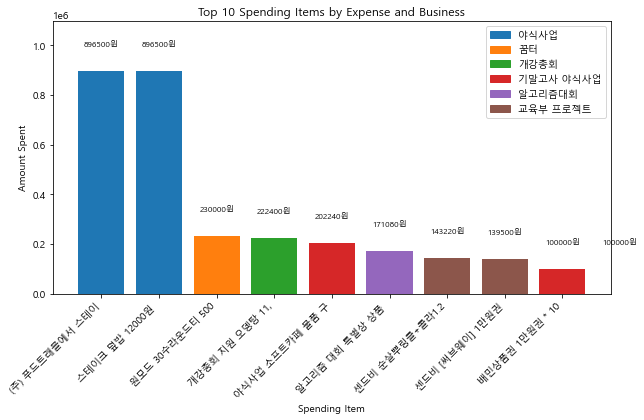

In [49]:
import matplotlib.pyplot as plt

# Create a figure with larger size
plt.figure(figsize=(10,6))

# Create a dictionary to map each unique '사업' value to a color
colors = {'야식사업': 'tab:blue', '꿈터': 'tab:orange', '개강총회': 'tab:green', 
          '기말고사 야식사업': 'tab:red', '알고리즘대회': 'tab:purple', '교육부 프로젝트': 'tab:brown'}

# Create a list of colors for each bar based on its '사업' value
bar_colors = [colors[s] for s in top_spending_items['사업']]

# Create a bar chart of the top 10 spending items
plt.bar(top_spending_items['세부항목'], top_spending_items['지출'], color=bar_colors)

# Add labels and title
plt.xlabel('Spending Item')
plt.ylabel('Amount Spent')
plt.title('Top 10 Spending Items by Expense and Business')

# Display the specific expense (in won) above each bar
for i, v in enumerate(top_spending_items['지출']):
    plt.text(i, v+100000, str(v)+'원', fontsize=8, ha='center')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust the position of the x-axis labels
plt.subplots_adjust(bottom=0.25)

# Modify the legend to show the name of each '사업' value with its corresponding color
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
labels = list(colors.keys())
plt.legend(handles, labels, loc='upper right')

# Set the y-axis limit to be slightly larger than the maximum '지출' value
plt.ylim(top=top_spending_items['지출'].max() + 200000)

# Display the graph
plt.show()
